


<img src = "https://upload.wikimedia.org/wikipedia/commons/4/40/Vista_panor%C3%A1mica_desde_Olympiapark%2C_M%C3%BAnich%2C_Alemania_2012-04-28%2C_DD_03.JPG" width = 900> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Munich</font></h1>










## Introduction 


Munich is the capital of Bavaria and the third-largest city in Germany, with a population of 1,558,395 inhabitants in 2020 [1]. Due to its high quality of life, its economic and cultural importance, Munich is a city that attracts investors, workers, families, and students, from Germany and abroad. It has a heated real estate market with high prices.

Our client is a real estate agency that operates in the city of Munich and seeks an effective tool to help its clients find the property they are looking for. The desired product is a model that classifies and maps the areas of the city according to the existing similarities. The classes found will help realtors to focus on the areas that best fit the profile of clients, Based on the service preferences that customers want in their future neighborhood.





## Data and Methodology

Munich district data postal codes were scraped from web page https://www.muenchen.de/int/en/living/postal-codes.html and RESTful API calls were made to Foursquare API to retrieve the information about the venues. The Foursquare's data was used to find out the types of places in the neighborhood and the frequency with which they were visited. Data preparation was done using Pandas library. 

This project used a machine learning model to classify and map similar areas of the city. Specifically, the K-Means Clustering model. Clustering is a technique to divide data into different groups, were the records in each group are similar to one another. So, the goal of clustering is to identify significant and meaningfuk groups of data. K-means dividedes the data into K cluster by minimizing the sum of the squred distances os each record to the mean of its assigned cluster [2].




###  Data preparation

1. first of all, import the necessary libraries for this project.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 
import folium # map rendering library

from unicodedata import normalize

2. Get the postcodes for the city of Munich

In [2]:
df_munich0 = pd.read_html('https://www.muenchen.de/int/en/living/postal-codes.html')[0]

In [3]:
df_munich0.head()

,District,Postal Code
0,Allach-Untermenzing,"80995, 80997, 80999, 81247, 81249"
1,Altstadt-Lehel,"80331, 80333, 80335, 80336, 80469, 80538, 80539"
2,Au-Haidhausen,"81541, 81543, 81667, 81669, 81671, 81675, 81677"
3,Aubing-Lochhausen-Langwied,"81243, 81245, 81249"
4,Berg am Laim,"81671, 81673, 81735, 81825"


In [4]:
df_munich0 = df_munich0.rename(columns = {'Postal Code': 'Postal_Code'}, inplace = False)

3. Explode the data

In [5]:
df_munich = df_munich0.assign(Postal_Code = df_munich0.Postal_Code.str.split(',')).explode('Postal_Code').reset_index(drop=True)                                                 

In [6]:
df_munich.head(126)

,District,Postal_Code
0,Allach-Untermenzing,80995
1,Allach-Untermenzing,80997
2,Allach-Untermenzing,80999
3,Allach-Untermenzing,81247
4,Allach-Untermenzing,81249
5,Altstadt-Lehel,80331
6,Altstadt-Lehel,80333
7,Altstadt-Lehel,80335
8,Altstadt-Lehel,80336
9,Altstadt-Lehel,80469


In [7]:
df_munich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   District     127 non-null    object
 1   Postal_Code  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


4. Get the latitude and longitude for each postal code. 

In [8]:
CLIENT_ID = 'SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO' # your Foursquare ID
CLIENT_SECRET = 'LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO
CLIENT_SECRET:LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV


In [9]:
df_munich1 = pd.DataFrame(columns=['District', 'Postal Code', 'Latitude', 'Longitude'])

# loop over all entries of old data frame and store according values
items = []
for idx, district in enumerate(df_munich['District']):
    code = df_munich['Postal_Code'][idx]
    address = district + ', ' + code # to get format of address

    geolocator = Nominatim(user_agent="mu_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    items.append({'District': district, 
                  'Postal Code': code,
                  'Latitude': latitude,
                  'Longitude': longitude})

In [10]:
df_munich1 = df_munich1.append(items)
df_munich1.head()

,District,Postal Code,Latitude,Longitude
0,Allach-Untermenzing,80995,48.195157,11.462973
1,Allach-Untermenzing,80997,48.195157,11.462973
2,Allach-Untermenzing,80999,48.195157,11.462973
3,Allach-Untermenzing,81247,48.195157,11.462973
4,Allach-Untermenzing,81249,48.195157,11.462973


In [11]:
df_munich1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     127 non-null    object 
 1   Postal Code  127 non-null    object 
 2   Latitude     127 non-null    float64
 3   Longitude    127 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


5. Viualization: Let's see all the postal codes on the map.

In [12]:
address = 'Munich, DE'

geolocator = Nominatim(user_agent="mu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [13]:
map_munich = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_munich1['Latitude'], df_munich1['Longitude'], df_munich1['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

6. Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them. 


In [14]:
CLIENT_ID = 'SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO' # your Foursquare ID
CLIENT_SECRET = 'LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO
CLIENT_SECRET:LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
munich_venues = getNearbyVenues(names=df_munich1['District'],
                                   latitudes=df_munich1['Latitude'],
                                   longitudes=df_munich1['Longitude']
                                  )

Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Aubing-Lochhausen-Langwied
Aubing-Lochhausen-Langwied
Aubing-Lochhausen-Langwied
Berg am Laim
Berg am Laim
Berg am Laim
Berg am Laim
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Feldmoching-Hasenbergl
Feldmoching-Hasenbergl
Feldmoching-Hasenbergl
Hadern
Hadern
Hadern
Laim
Laim
Laim
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Moosach
Moosach
Moosach
Moosach
Moosach
Neuhausen-Nymphenburg
Neuhausen-Nym

In [17]:
munich_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            3394 non-null   object 
 1   District Latitude   3394 non-null   float64
 2   District Longitude  3394 non-null   float64
 3   Venue               3394 non-null   object 
 4   Venue Latitude      3394 non-null   float64
 5   Venue Longitude     3394 non-null   float64
 6   Venue Category      3394 non-null   object 
dtypes: float64(4), object(3)
memory usage: 185.7+ KB


In [18]:
munich_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Allach-Untermenzing,40,40,40,40,40,40
Altstadt-Lehel,700,700,700,700,700,700
Au-Haidhausen,259,259,259,259,259,259
Berg am Laim,29,29,29,29,29,29
Bogenhausen,76,76,76,76,76,76
Feldmoching-Hasenbergl,6,6,6,6,6,6
Hadern,30,30,30,30,30,30
Laim,66,66,66,66,66,66
Ludwigsvorstadt-Isarvorstadt,392,392,392,392,392,392


In [19]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [20]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['District'] = munich_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

,District,Afghan Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cultural Center,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Hill,Historic Site,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Laundry Service,Light Rail Station,Manti Place,Market,Martial Arts School,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
munich_onehot.shape

(3394, 171)

In [22]:
munich_grouped = munich_onehot.groupby('District').mean().reset_index()
munich_grouped

,District,Afghan Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cultural Center,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Hill,Historic Site,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Laundry Service,Light Rail Station,Manti Place,Market,Martial Arts School,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Altstadt-Lehel,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.02,0.000000,0.000000,0.000000,0.010000,0.000000,0

In [23]:
munich_grouped.shape

(24, 171)

In [24]:
num_top_venues = 10

for hood in munich_grouped['District']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                        venue  freq
0                 Supermarket  0.25
1                   Drugstore  0.25
2                      Bakery  0.12
3          Italian Restaurant  0.12
4             Automotive Shop  0.12
5         Sporting Goods Shop  0.12
6                   Pet Store  0.00
7                 Opera House  0.00
8  Modern European Restaurant  0.00
9                       Motel  0.00


----Altstadt-Lehel----
                 venue  freq
0                 Café  0.10
1                Hotel  0.07
2    German Restaurant  0.06
3                Plaza  0.05
4  Bavarian Restaurant  0.05
5           Restaurant  0.03
6         Gourmet Shop  0.03
7          Coffee Shop  0.03
8               Church  0.03
9   Italian Restaurant  0.03


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.08
1        Concert Hall  0.05
2   French Restaurant  0.05
3   Afghan Restaurant  0.03
4           Nightclub  0.03
5           Rock Club  0.03
6          R

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


In [27]:
# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = munich_grouped['District']


In [28]:
for ind in np.arange(munich_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

In [29]:
district_venues_sorted.head(56)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
1,Altstadt-Lehel,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop
2,Au-Haidhausen,Italian Restaurant,French Restaurant,Concert Hall,Afghan Restaurant,Music Venue,Restaurant,Café,Pool,Plaza,Pizza Place
3,Berg am Laim,Supermarket,Drugstore,Café,Bakery,Hotel,Discount Store,Gastropub,Light Rail Station,Bus Stop,Tram Station
4,Bogenhausen,Bus Stop,Drugstore,Bakery,Italian Restaurant,Greek Restaurant,Bank,Pharmacy,Park,Business Service,Supermarket
5,Feldmoching-Hasenbergl,Auto Workshop,Greek Restaurant,Yoga Studio,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Drugstore,Doner Restaurant
6,Hadern,Supermarket,Pharmacy,Metro Station,Sandwich Place,Ice Cream Shop,Trattoria/Osteria,German Restaurant,Sushi Restaurant,Bakery,Dessert Shop
7,Laim,Supermarket,Restaurant,Coffee Shop,Organic Grocery,Plaza,Doner Restaurant,Mobile Phone Shop,Sporting Goods Shop,Bank,Sandwich Place
8,Ludwigsvorstadt-Isarvorstadt,Café,Bar,Pizza Place,Italian Restaurant,Asian Restaurant,Cocktail Bar,Vietnamese Restaurant,Ice Cream Shop,Restaurant,French Restaurant
9,Maxvorstadt,Café,Bar,German Restaurant,Bakery,Coffee Shop,Steakhouse,Vietnamese Restaurant,Event Space,Falafel Restaurant,Burger Joint


## Cluster Neighbourhoods

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
munich_grouped_clustering = munich_grouped.drop('District',1)

In [32]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(munich_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

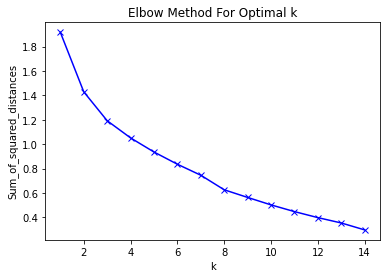

In [33]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# set number of clusters
kclusters = 8


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 0, 0, 6, 4, 3, 4, 1, 0, 0])

In [35]:

district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

munich_merged = df_munich1

munich_merged = munich_merged.join(district_venues_sorted.set_index('District'), on='District')

munich_merged = munich_merged.dropna()

munich_merged.head() # check the last columns!

,District,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,80995,48.195157,11.462973,6.0,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
1,Allach-Untermenzing,80997,48.195157,11.462973,6.0,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
2,Allach-Untermenzing,80999,48.195157,11.462973,6.0,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
3,Allach-Untermenzing,81247,48.195157,11.462973,6.0,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
4,Allach-Untermenzing,81249,48.195157,11.462973,6.0,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant


In [36]:
munich_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 126
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                124 non-null    object 
 1   Postal Code             124 non-null    object 
 2   Latitude                124 non-null    float64
 3   Longitude               124 non-null    float64
 4   Cluster Labels          124 non-null    float64
 5   1st Most Common Venue   124 non-null    object 
 6   2nd Most Common Venue   124 non-null    object 
 7   3rd Most Common Venue   124 non-null    object 
 8   4th Most Common Venue   124 non-null    object 
 9   5th Most Common Venue   124 non-null    object 
 10  6th Most Common Venue   124 non-null    object 
 11  7th Most Common Venue   124 non-null    object 
 12  8th Most Common Venue   124 non-null    object 
 13  9th Most Common Venue   124 non-null    object 
 14  10th Most Common Venue  124 non-null    ob

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



In [38]:
munich_merged['Cluster Labels'] = munich_merged['Cluster Labels'].astype(int)

In [39]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['District'],munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [40]:
munich_merged.head(120)

,District,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,80995,48.195157,11.462973,6,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
1,Allach-Untermenzing,80997,48.195157,11.462973,6,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
2,Allach-Untermenzing,80999,48.195157,11.462973,6,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
3,Allach-Untermenzing,81247,48.195157,11.462973,6,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
4,Allach-Untermenzing,81249,48.195157,11.462973,6,Drugstore,Supermarket,Sporting Goods Shop,Automotive Shop,Italian Restaurant,Bakery,Yoga Studio,Diner,Farmers Market,Falafel Restaurant
5,Altstadt-Lehel,80331,48.137828,11.574582,0,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop
6,Altstadt-Lehel,80333,48.137828,11.574582,0,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop
7,Altstadt-Lehel,80335,48.137828,11.574582,0,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop
8,Altstadt-Lehel,80336,48.137828,11.574582,0,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop
9,Altstadt-Lehel,80469,48.137828,11.574582,0,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Italian Restaurant,Restaurant,Gourmet Shop,Church,Coffee Shop


### Examine Clusters

In [41]:
#Cluster 
cluster1 = munich_merged.loc[munich_merged['Cluster Labels'] == 1,munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster1['1st Most Common Venue'].value_counts()

Supermarket    3
Name: 1st Most Common Venue, dtype: int64

In [42]:
#Cluster 
cluster2 = munich_merged.loc[munich_merged['Cluster Labels'] == 2, munich_merged.columns[[0,1] + list(range(5,munich_merged.shape[1]))]]
cluster2['1st Most Common Venue'].value_counts()

Fast Food Restaurant    8
Name: 1st Most Common Venue, dtype: int64

In [43]:
#Cluster 3
cluster3 = munich_merged.loc[munich_merged['Cluster Labels'] == 3, munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster3['1st Most Common Venue'].value_counts()

Auto Workshop    3
Name: 1st Most Common Venue, dtype: int64

In [44]:
#Cluster 4 Color Green
cluster4 = munich_merged.loc[munich_merged['Cluster Labels'] == 4, munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster4['1st Most Common Venue'].value_counts()

Supermarket          19
German Restaurant    10
Bakery               10
Bus Stop             10
Name: 1st Most Common Venue, dtype: int64

In [45]:
#Cluster 5
cluster5 = munich_merged.loc[munich_merged['Cluster Labels'] == 5, munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster5['1st Most Common Venue'].value_counts()

Italian Restaurant    5
Name: 1st Most Common Venue, dtype: int64

In [46]:
#Cluster 6
cluster6 = munich_merged.loc[munich_merged['Cluster Labels'] == 6, munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster6['1st Most Common Venue'].value_counts()

Supermarket    8
Drugstore      5
Name: 1st Most Common Venue, dtype: int64

In [47]:
#Cluster 7
cluster7 = munich_merged.loc[munich_merged['Cluster Labels'] == 7, munich_merged.columns[[0,1] + list(range(5, munich_merged.shape[1]))]]
cluster7['1st Most Common Venue'].value_counts()

Spa    6
Name: 1st Most Common Venue, dtype: int64

### Results and Discussion

The city of Munich was divided into 8 clusters according to the similarities found in the Foursquare venues data. The central area of the city belongs to the first group, red color, these districts together presented as '1st Most Common Venue', 22 Cafes, 8 Parks, and 7 Italian Restaurants. Apparently, this is a perfect cluster for those who like to drink coffee. The green-colored cluster, number 4, was the largest one found. So, this cluster shows that the city of Munich is somehow homogeneous, with many supermarkets, bakeries, german restaurants, and playgrounds, I would say this cluster is a good areas for families with children. 


### Conclusion

Despite the limitations of the data, it was possible to have an overview of similar areas existing in the city of Munich. The aim of this study was to facilitate the work of real estate agents, who, according to the clusters found, can focus the search for properties in similar areas based on the preferences of their clients.

### Bibliography

[1] Wikipedia. https://en.wikipedia.org/wiki/Munich 

[2]Peter Bruce, Andrew Bruce, Peter Gedeck. "Practical Statistics for Data Scientists, 2nd Edition". O'Reilly, May 2010.

